In [36]:
# Let`s import all packages that we may need:

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.





In [37]:
## Data can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00235/
## Just open the zip file and grab the file 'household_power_consumption.txt' put it in the directory
## that you would like to run the code.


Temp_A = pd.read_csv('Temp_at_ZoneA.csv', sep=',',   # comma uses as a seperator in this dataset
                 infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])

Temp_B = pd.read_csv('Temp_at_ZoneB.csv', sep=',',   # comma uses as a seperator in this dataset
                 infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])

Temp_Center = pd.read_csv('Temp_BCK.csv', sep=',',   # comma uses as a seperator in this dataset
                 infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])

Temp_out = pd.read_csv('Outdoor_Temp.csv', sep=',',   # comma uses as a seperator in this dataset
                 infer_datetime_format=True, on_bad_lines='skip',
                 low_memory=False, na_values=['nan','?'])

Temp_pend = pd.read_csv('Pending Temp.csv',sep=',',    # comma uses as a seperator in this dataset
                 infer_datetime_format=True, on_bad_lines='skip',
                 low_memory=False, na_values=['nan','?'])


In [38]:
Temp_A.columns = ['Date','Temperature_A'] # Define column


In [39]:
Temp_A.head()

,Date,Temperature_A
0,2023-07-20 11:00:06.670944+00:00,19.700001
1,2023-07-20 11:00:15.066994+00:00,19.700001
2,2023-07-20 11:00:36.693811+00:00,19.700001
3,2023-07-20 11:00:55.844668+00:00,19.700001
4,2023-07-20 11:01:15.558574+00:00,19.700001


In [40]:
Temp_A['Date'] = pd.to_datetime(Temp_A['Date'])
Temp_A['Datetime'] = Temp_A['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Customize the format here

Temp_A['Datetime'] = pd.to_datetime(Temp_A['Datetime'])
# Drop the original 'Date' column if needed
Temp_A = Temp_A.drop(columns=['Date'])
Temp_A = pd.DataFrame(Temp_A)  # convert into Dataframe
print(Temp_A.head())


   Temperature_A            Datetime
0      19.700001 2023-07-20 11:00:06
1      19.700001 2023-07-20 11:00:15
2      19.700001 2023-07-20 11:00:36
3      19.700001 2023-07-20 11:00:55
4      19.700001 2023-07-20 11:01:15


In [41]:
Temp_B.columns = ['Date','Temperature_B']
Temp_B.head()



,Date,Temperature_B
0,2023-07-20 11:00:06.670944+00:00,20.100000
1,2023-07-20 11:00:15.066994+00:00,20.100000
2,2023-07-20 11:00:36.693811+00:00,20.200001
3,2023-07-20 11:00:55.844668+00:00,20.100000
4,2023-07-20 11:01:15.558574+00:00,20.200001


In [42]:
# Assuming your DataFrame is named Temp_A
Temp_B['Date'] = pd.to_datetime(Temp_B['Date'])
Temp_B['Datetime'] = Temp_B['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Customize the format here

# Drop the original 'Date' column if needed
Temp_B = Temp_B.drop(columns=['Date'])
Temp_B = pd.DataFrame(Temp_B)

print(Temp_B.head())

   Temperature_B             Datetime
0      20.100000  2023-07-20 11:00:06
1      20.100000  2023-07-20 11:00:15
2      20.200001  2023-07-20 11:00:36
3      20.100000  2023-07-20 11:00:55
4      20.200001  2023-07-20 11:01:15


In [43]:
Temp_Center.columns = ['Date','Temperature_Center']
Temp_Center.head()

,Date,Temperature_Center
0,2023-07-20 11:00:06.670944+00:00,20.200001
1,2023-07-20 11:00:15.066994+00:00,20.200001
2,2023-07-20 11:00:36.693811+00:00,20.200001
3,2023-07-20 11:00:55.844668+00:00,20.299999
4,2023-07-20 11:01:15.558574+00:00,20.299999


In [44]:
# Assuming your DataFrame is named Temp_A
Temp_Center['Date'] = pd.to_datetime(Temp_Center['Date'])
Temp_Center['Datetime'] = Temp_Center['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Customize the format here

# Drop the original 'Date' column if needed
Temp_Center = Temp_Center.drop(columns=['Date'])
Temp_Center = pd.DataFrame(Temp_Center)

print(Temp_Center.head())

   Temperature_Center             Datetime
0           20.200001  2023-07-20 11:00:06
1           20.200001  2023-07-20 11:00:15
2           20.200001  2023-07-20 11:00:36
3           20.299999  2023-07-20 11:00:55
4           20.299999  2023-07-20 11:01:15


In [45]:
Temp_out.columns = ['Date','Outdoor_Temp']
Temp_out.head()

,Date,Outdoor_Temp
0,2023-08-04 10:58:58.465151+00:00,15.46
1,2023-08-04 10:59:46.523043+00:00,15.46
2,2023-08-04 11:05:38.612674+00:00,16.02
3,2023-08-04 11:34:42.533687+00:00,17.45
4,2023-08-04 12:04:43.636945+00:00,17.66


In [46]:
# Assuming your DataFrame is named Temp_A
Temp_out['Date'] = pd.to_datetime(Temp_out['Date'])
Temp_out['Datetime'] = Temp_out['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Customize the format here

# Drop the original 'Date' column if needed
Temp_out = Temp_out.drop(columns=['Date'])
Temp_out = pd.DataFrame(Temp_out)

print(Temp_out.head())

   Outdoor_Temp             Datetime
0         15.46  2023-08-04 10:58:58
1         15.46  2023-08-04 10:59:46
2         16.02  2023-08-04 11:05:38
3         17.45  2023-08-04 11:34:42
4         17.66  2023-08-04 12:04:43


In [47]:
Temp_pend.columns = ['Date','Outdoor_Temp']
Temp_pend.head()

,Date,Outdoor_Temp
0,2023-07-20:01:01:01,18.3
1,2023-07-20:02:02:02,17.4
2,2023-07-20:03:03:03,16.7
3,2023-07-20:04:04:04,15.9
4,2023-07-20:05:05:05,15.4


In [48]:

# Concatenate dataframes row-wise without resetting index
Outdoor_Temp = pd.concat([Temp_pend, Temp_out])
Outdoor_Temp.head()

,Date,Outdoor_Temp,Datetime
0,2023-07-20:01:01:01,18.3,NaN
1,2023-07-20:02:02:02,17.4,NaN
2,2023-07-20:03:03:03,16.7,NaN
3,2023-07-20:04:04:04,15.9,NaN
4,2023-07-20:05:05:05,15.4,NaN


In [49]:
Outdoor_Temp = Outdoor_Temp.drop(columns=['Date']) # Remove the Date column from outdoor Temp

In [50]:

#If your dataframes have different indexes, you might encounter issues during concatenation.
#You can reset the index on each dataframe before concatenating to ensure consistent indexes

Temp_A.reset_index(drop=True, inplace=True)
Temp_B.reset_index(drop=True, inplace=True)
Temp_Center.reset_index(drop=True, inplace=True)
Outdoor_Temp.reset_index(drop=True, inplace=True)

# Create a DataFrame by concatenating the series along columns
Data_Temp = pd.concat([Temp_A, Temp_B, Temp_Center, Outdoor_Temp],axis=1)





In [51]:
# another sanity check to make sure that there are not more any nan.these are the mising datas
Data_Temp.isnull().sum()

Temperature_A            533
Datetime                 533
Temperature_B           6329
Datetime                6329
Temperature_Center         0
Datetime                   0
Outdoor_Temp          126899
Datetime              127266
dtype: int64

In [52]:
Data_Temp = Data_Temp.drop(Data_Temp['Datetime'],axis=1) # Remove Datetime column from an entire Dataframe
Data_Temp.head()

,Temperature_A,Temperature_B,Temperature_Center,Outdoor_Temp
0,19.700001,20.100000,20.200001,18.3
1,19.700001,20.100000,20.200001,17.4
2,19.700001,20.200001,20.200001,16.7
3,19.700001,20.100000,20.299999,15.9
4,19.700001,20.200001,20.299999,15.4


In [53]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,3):   # checking for all the columns
     if not Data_Temp.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1]

Handle the missing data using MEAN value. not recomened to environmental Temperature which needs a seasonal approch

In [54]:
# filling nan with mean in any columns used mean value to handle missing data

for j in range(0,4):
        Data_Temp.iloc[:,j]= Data_Temp.iloc[:,j].fillna(Data_Temp.iloc[:,j].mean())

In [55]:
# another sanity check to make sure that there are not more any nan
Data_Temp.isnull().sum()

Temperature_A         0
Temperature_B         0
Temperature_Center    0
Outdoor_Temp          0
dtype: int64

NETWORK ELEMENTS DATA PREPROCESING WORK

In [56]:
# Data manipulation
import pandas as pd # for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.

# Read in the weather data csv - keep only the columns we need
NE=pd.read_csv('NetworkElement.csv')
Card=pd.read_csv('Card_details.csv')



In [57]:
NE.head()  # Print Network Elements

,2023-07-20 12:00:02,AUTNPI1,222194749
0,2023-07-20 12:00:02,AUTNPI1,2.221947e+08
1,2023-07-20 12:00:02,AUTNPI2,1.314140e+03
2,2023-07-20 12:00:02,AUTNPI3,1.184420e+03
3,2023-07-20 12:00:02,Astoria,1.020000e+02
4,2023-07-20 12:00:02,Chelsea,1.173000e+02


In [58]:
Card.head() # Print Card Details

,2023-08-21 15:30:37,NICE,191,39C,45.25
0,2023-08-21 15:30:37,Lyon,201,44C,48.01
1,2023-08-21 15:30:37,Lyon,301,56C,47.69
2,2023-08-21 15:30:37,AUTNPI3,321,38C,97.69
3,2023-08-21 15:30:37,NICE,341,47C,49.87
4,2023-08-21 15:30:37,AUTNPI1,561,40C,37.71


In [59]:
NE.columns = ['Date','Elements','NE_Power'] # Define column for a Network elements
Card.columns = ['Date','Elements','Card_ID','Card_Temp','Card_Power'] # Define column for a Cards

In [60]:
#Filter Data that contains Specific elements and make as an indivitual Dataframes
AUTNPI1 = NE[NE['Elements'].str.contains('AUTNPI1')]
AUTNPI2 = NE[NE['Elements'].str.contains('AUTNPI2')]
AUTNPI3 = NE[NE['Elements'].str.contains('AUTNPI3')]
Astoria = NE[NE['Elements'].str.contains('Astoria')]
Chelsea = NE[NE['Elements'].str.contains('Chelsea')]
DGE = NE[NE['Elements'].str.contains('DGE')]
Garment = NE[NE['Elements'].str.contains('Garment')]
ILA = NE[NE['Elements'].str.contains('ILA')]
Lyon = NE[NE['Elements'].str.contains('Lyon')]
nice = NE[NE['Elements'].str.contains('NICE')]
PSIM212 = NE[NE['Elements'].str.contains('PSIM212')]
PSIM214 = NE[NE['Elements'].str.contains('PSIM214')]
Soho = NE[NE['Elements'].str.contains('Soho')]
Tribeca = NE[NE['Elements'].str.contains('Tribeca')]


In [61]:
# filter Data that contains Specific Card details and make as an indivitual Dataframes
C_AUTNPI1 = Card[Card['Elements'].str.contains('AUTNPI1')]
C_AUTNPI2 = Card[Card['Elements'].str.contains('AUTNPI2')]
C_AUTNPI3 = Card[Card['Elements'].str.contains('AUTNPI3')]
C_Astoria = Card[Card['Elements'].str.contains('Astoria')]
C_Chelsea = Card[Card['Elements'].str.contains('Chelsea')]
C_DGE = Card[Card['Elements'].str.contains('DGE')]
C_Garment = Card[Card['Elements'].str.contains('Garment')]
C_ILA = Card[Card['Elements'].str.contains('ILA')]
C_Lyon = Card[Card['Elements'].str.contains('Lyon')]
C_nice = Card[Card['Elements'].str.contains('NICE')]
C_PSIM212 = Card[Card['Elements'].str.contains('PSIM212')]
C_PSIM214 = Card[Card['Elements'].str.contains('PSIM214')]
C_Soho = Card[Card['Elements'].str.contains('Soho')]
C_Tribeca = Card[Card['Elements'].str.contains('Tribeca')]

In [62]:
# Create a DataFrame by concatenating the series along columns
Data_NE = pd.concat([AUTNPI1, AUTNPI2,AUTNPI3,Astoria,Chelsea,DGE,Garment,ILA,Lyon,nice,PSIM212,PSIM214,Soho,Tribeca ],axis=1)
Data_Card = pd.concat([C_AUTNPI1, C_AUTNPI2,C_AUTNPI3,C_Astoria,C_Chelsea,C_DGE,C_Garment,C_ILA,C_Lyon,C_nice,C_PSIM212,C_PSIM214,C_Soho,C_Tribeca ],axis=1)
Data = pd.concat([Data_NE,Data_Card],axis=1) # final dataframe for a visualization


In [63]:
#Remove C from Card_Temp object type data and convert into float type for analysis

C_AUTNPI1['Card_Temp'] = C_AUTNPI1['Card_Temp'].replace(r'\D', '', regex=True).astype(float) # regex=True indicates the Regular expression which uses to identify the special pattern in complex data (Remove C from Temp)
C_AUTNPI2['Card_Temp'] = C_AUTNPI2['Card_Temp'].replace(r'\D', '', regex=True).astype(float)
C_AUTNPI3['Card_Temp'] = C_AUTNPI3['Card_Temp'].replace(r'\D', '', regex=True).astype(float)
C_Lyon['Card_Temp'] = C_Lyon['Card_Temp'].replace(r'\D', '', regex=True).astype(float)
C_nice['Card_Temp'] = C_nice['Card_Temp'].replace(r'\D', '', regex=True).astype(float)


<ipython-input-63-7b7f49af3081>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_AUTNPI1['Card_Temp'] = C_AUTNPI1['Card_Temp'].replace(r'\D', '', regex=True).astype(float) # regex=True indicates the Regular expression which uses to identify the special pattern in complex data (Remove C from Temp)
<ipython-input-63-7b7f49af3081>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_AUTNPI2['Card_Temp'] = C_AUTNPI2['Card_Temp'].replace(r'\D', '', regex=True).astype(float)
<ipython-input-63-7b7f49af3081>:5: Set

Power consumption Visualization for Network elements

<ipython-input-64-586784d309a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUTNPI2['Date'] = pd.to_datetime(AUTNPI2['Date'])
<ipython-input-64-586784d309a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUTNPI3['Date'] = pd.to_datetime(AUTNPI3['Date'])
<ipython-input-64-586784d309a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

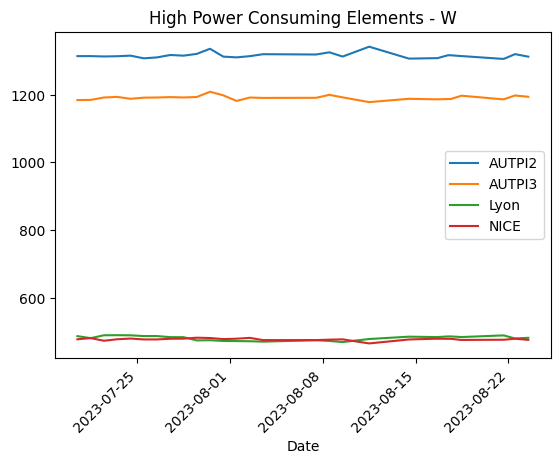

<Figure size 400x500 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates   # uses to change a date format into weekly format

# Convert 'Date' columns to datetime format (assuming AUTNPI2, AUTNPI3, Lyon, and nice are DataFrames)
AUTNPI2['Date'] = pd.to_datetime(AUTNPI2['Date'])
AUTNPI3['Date'] = pd.to_datetime(AUTNPI3['Date'])
Lyon['Date'] = pd.to_datetime(Lyon['Date'])
nice['Date'] = pd.to_datetime(nice['Date'])

# Configure the x-axis date locator and formatter
date_locator = mdates.WeekdayLocator(interval=1)  # Show ticks every 1 week
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD

# Create a new figure and axis
fig, ax = plt.subplots()

# Set x-axis locator and formatter
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)

# Plot data on the same axis
AUTNPI2.plot(ax=ax, x='Date', y='NE_Power', label='AUTPI2')
AUTNPI3.plot(ax=ax, x='Date', y='NE_Power', label='AUTPI3')
Lyon.plot(ax=ax, x='Date', y='NE_Power', label='Lyon')
nice.plot(ax=ax, x='Date', y='NE_Power', label='NICE')

# Set plot title and x-axis label rotation
plt.title('High Power Consuming Elements - W')
plt.xticks(rotation=45)
plt.figure(figsize=(4, 5))

# Display legend
ax.legend()

# Show the plot
plt.show()



<ipython-input-68-8a80905a64e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUTNPI1['Date'] = pd.to_datetime(AUTNPI1['Date'])


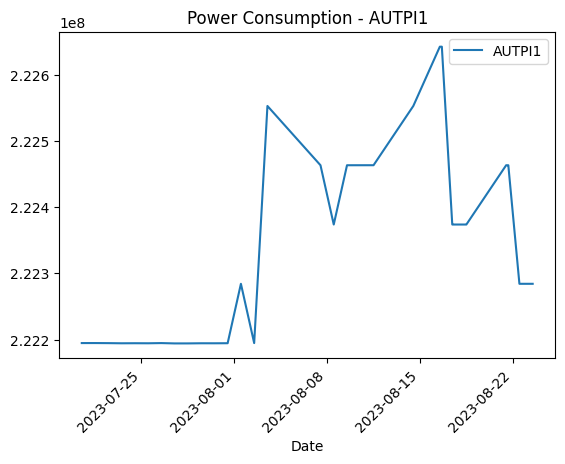

<Figure size 400x500 with 0 Axes>

In [68]:

AUTNPI1['Date'] = pd.to_datetime(AUTNPI1['Date'])

# Configure the x-axis date locator and formatter
date_locator = mdates.WeekdayLocator(interval=1)  # Show ticks every 1 week
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD

# Create a new figure and axis
fig, ax = plt.subplots()

# Set x-axis locator and formatter
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)

# Plot data on the same axis
AUTNPI1.plot(ax=ax, x='Date', y='NE_Power', label='AUTPI1')


# Set plot title and x-axis label rotation
plt.title('Power Consumption - AUTPI1')
plt.xticks(rotation=45)
plt.figure(figsize=(4, 5))

# Display legend
ax.legend()

# Show the plot
plt.show()


<ipython-input-69-78be12c3aba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Astoria['Date'] = pd.to_datetime(Astoria['Date'])
<ipython-input-69-78be12c3aba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chelsea['Date'] = pd.to_datetime(Chelsea['Date'])
<ipython-input-69-78be12c3aba8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

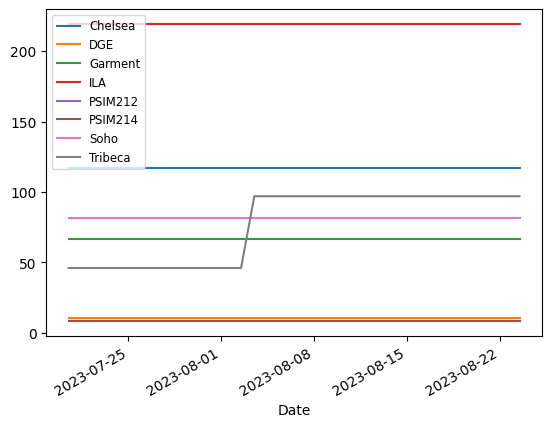

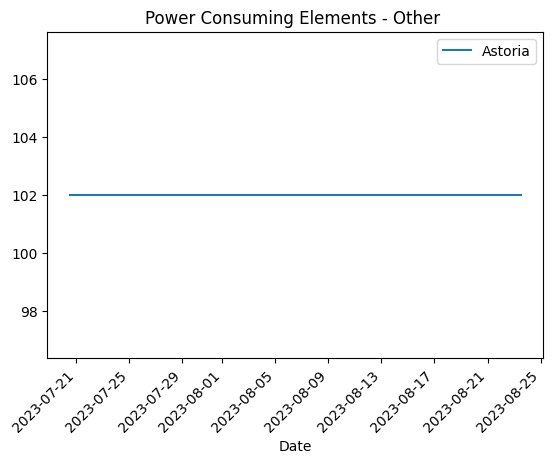

In [69]:
Astoria['Date'] = pd.to_datetime(Astoria['Date'])
Chelsea['Date'] = pd.to_datetime(Chelsea['Date'])
DGE['Date'] = pd.to_datetime(DGE['Date'])
Garment['Date'] = pd.to_datetime(Garment['Date'])
ILA['Date'] = pd.to_datetime(ILA['Date'])
PSIM212['Date'] = pd.to_datetime(PSIM212['Date'])
PSIM214['Date'] = pd.to_datetime(PSIM214['Date'])
Soho['Date'] = pd.to_datetime(Soho['Date'])
Tribeca['Date'] = pd.to_datetime(Tribeca['Date'])

# Configure the x-axis date locator and formatter
date_locator = mdates.WeekdayLocator(interval=1)  # Show ticks every 1 week
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD

# Create a new figure and axis
fig, ax = plt.subplots()

# Set x-axis locator and formatter
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)

# Plot data on the same axis
Astoria.plot(x='Date', y='NE_Power',label='Astoria')
Chelsea.plot(ax=ax, x='Date', y='NE_Power',label='Chelsea')
DGE.plot(ax=ax, x='Date', y='NE_Power',label='DGE')
Garment.plot(ax=ax, x='Date', y='NE_Power',label='Garment')
ILA.plot(ax=ax, x='Date', y='NE_Power',label='ILA')
PSIM212.plot(ax=ax, x='Date', y='NE_Power',label='PSIM212')
PSIM214.plot(ax=ax, x='Date', y='NE_Power',label='PSIM214')
Soho.plot(ax=ax, x='Date', y='NE_Power',label='Soho')
Tribeca.plot(ax=ax, x='Date', y='NE_Power',label='Tribeca')

# Set plot title and x-axis label rotation
plt.title('Power Consuming Elements - Other ')
plt.xticks(rotation=45)

# Display legend with correspondance font size and position
legend = ax.legend(loc='upper left', fontsize='small')
#ax.legend()

# Show the plot
plt.show()


Cards Power Visualization

<ipython-input-100-59e48eac80b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_AUTNPI1['Date'] = pd.to_datetime(C_AUTNPI1['Date'])
<ipython-input-100-59e48eac80b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_AUTNPI2['Date'] = pd.to_datetime(C_AUTNPI2['Date'])
<ipython-input-100-59e48eac80b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<Figure size 1000x600 with 0 Axes>

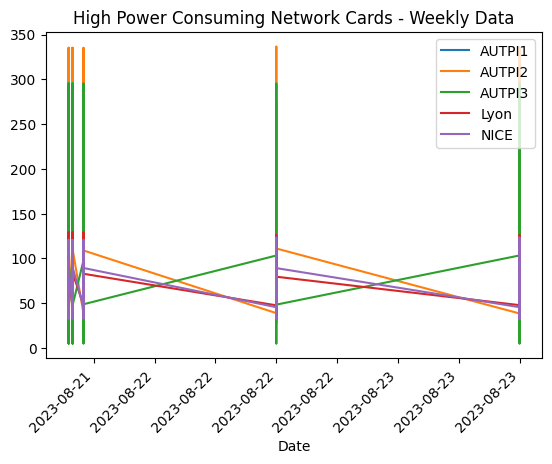

In [100]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you've already converted the 'Date' columns to datetime as you mentioned

# Convert 'Date' columns to datetime format (assuming AUTNPI2, AUTNPI3, Lyon, and nice are DataFrames)
C_AUTNPI1['Date'] = pd.to_datetime(C_AUTNPI1['Date'])
C_AUTNPI2['Date'] = pd.to_datetime(C_AUTNPI2['Date'])
C_AUTNPI3['Date'] = pd.to_datetime(C_AUTNPI3['Date'])
C_Lyon['Date'] = pd.to_datetime(C_Lyon['Date'])
C_nice['Date'] = pd.to_datetime(C_nice['Date'])

# Configure the x-axis date locator and formatter
#ndays= 7
date_locator = mdates.DAILY # Show ticks every 1 week
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a new figure and axis
fig, ax = plt.subplots()

# Set x-axis locator and formatter
#ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)

# Plot data on the same axis
C_AUTNPI1.plot(ax=ax, x='Date', y='Card_Power', label='AUTPI1')
C_AUTNPI2.plot(ax=ax, x='Date', y='Card_Power', label='AUTPI2')
C_AUTNPI3.plot(ax=ax, x='Date', y='Card_Power', label='AUTPI3')
C_Lyon.plot(ax=ax, x='Date', y='Card_Power', label='Lyon')
C_nice.plot(ax=ax, x='Date', y='Card_Power', label='NICE')

# Set plot title and x-axis label rotation
plt.title('High Power Consuming Network Cards - Weekly Data')
plt.xticks(rotation=45)

# Display legend
ax.legend()

# Show the plot
plt.show()





Card Temperature Visualization

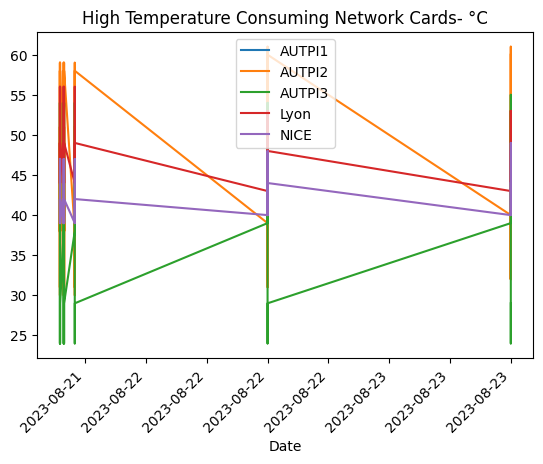

<Figure size 400x500 with 0 Axes>

In [103]:



# Configure the x-axis date locator and formatter
date_locator = mdates.DAILY  # Show ticks every 1 week
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD

# Create a new figure and axis
fig, ax = plt.subplots()
# Set x-axis locator and formatter
#ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)

# Plot data on the same axis
C_AUTNPI1.plot(ax=ax, x='Date', y='Card_Temp',label='AUTPI1')
C_AUTNPI2.plot(ax=ax, x='Date', y='Card_Temp', label='AUTPI2')
C_AUTNPI3.plot(ax=ax, x='Date', y='Card_Temp', label='AUTPI3')
C_Lyon.plot(ax=ax, x='Date', y='Card_Temp', label='Lyon')
C_nice.plot(ax=ax, x='Date', y='Card_Temp', label='NICE')

# Set plot title and x-axis label rotation
plt.title('High Temperature Consuming Network Cards- °C')
plt.xticks(rotation=45)
plt.figure(figsize=(4, 5))

# Display legend
ax.legend()

# Show the plot
plt.show()


Pearson Correlation Metrix - Temperatures from  different zones and Outdoor , Power consumptions of Network elements , Powers of Cards and Temperature of Cards


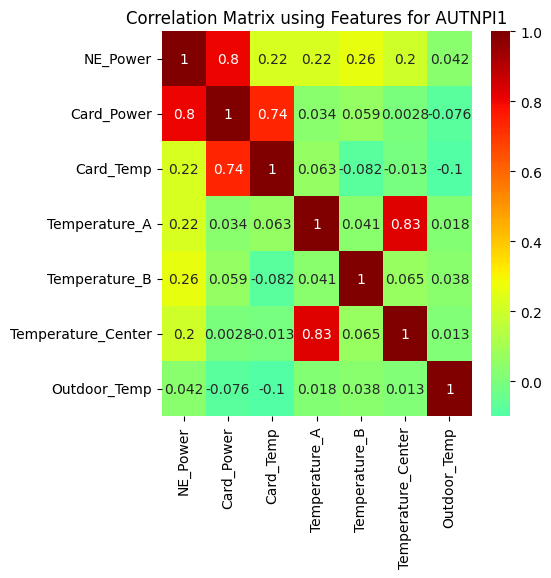

In [104]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI1.NE_Power,C_AUTNPI1.Card_Power,C_AUTNPI1.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

#Total1 = pd.concat([AUTNPI1.NE_Power,C_AUTNPI1.Card_Power,C_AUTNPI1.Card_Temp,Temp_A,Temp_B, Temp_Center, Outdoor_Temp],axis=1)


plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('Correlation Matrix using Features for AUTNPI1')
plt.show()

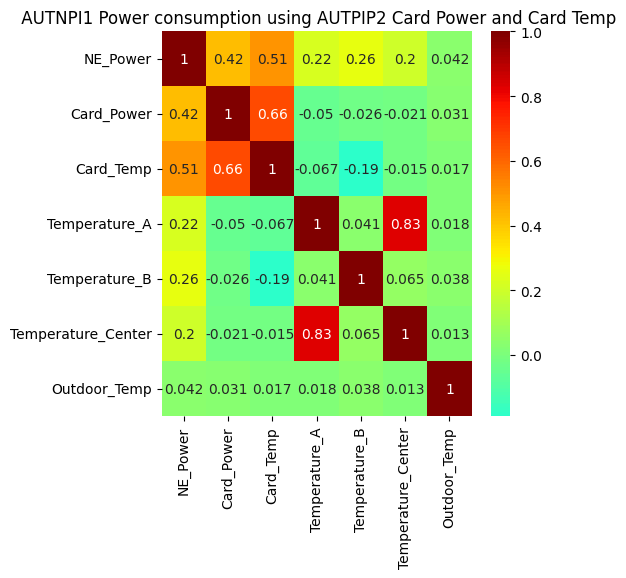

In [105]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI1.NE_Power,C_AUTNPI2.Card_Power,C_AUTNPI2.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI1 Power consumption using AUTPIP2 Card Power and Card Temp')
plt.show()

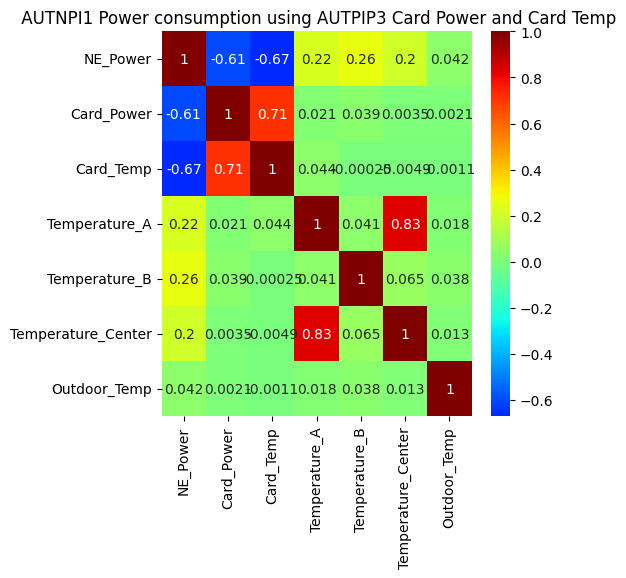

In [106]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI1.NE_Power,C_AUTNPI3.Card_Power,C_AUTNPI3.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI1 Power consumption using AUTPIP3 Card Power and Card Temp')
plt.show()


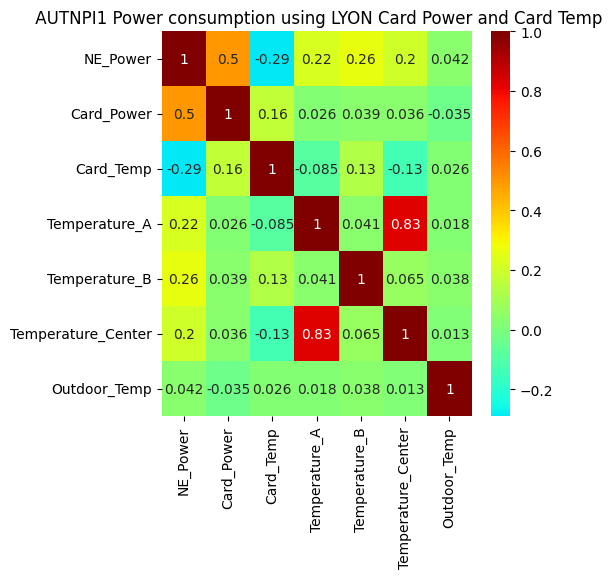

In [107]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI1.NE_Power,C_Lyon.Card_Power,C_Lyon.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI1 Power consumption using LYON Card Power and Card Temp')
plt.show()


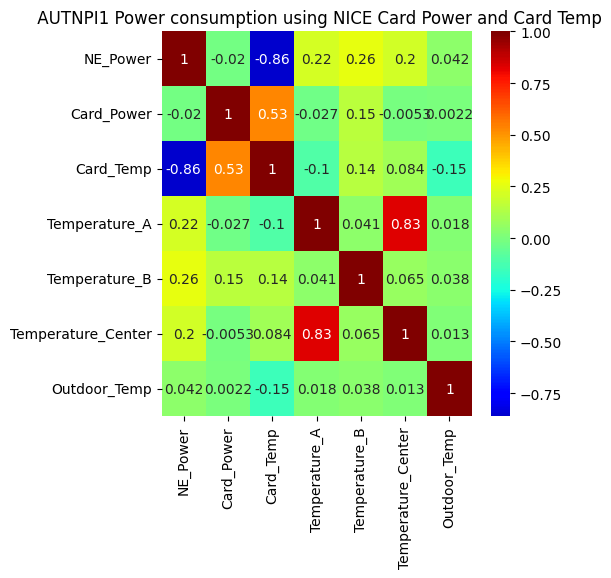

In [108]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI1.NE_Power,C_nice.Card_Power,C_nice.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI1 Power consumption using NICE Card Power and Card Temp')
plt.show()


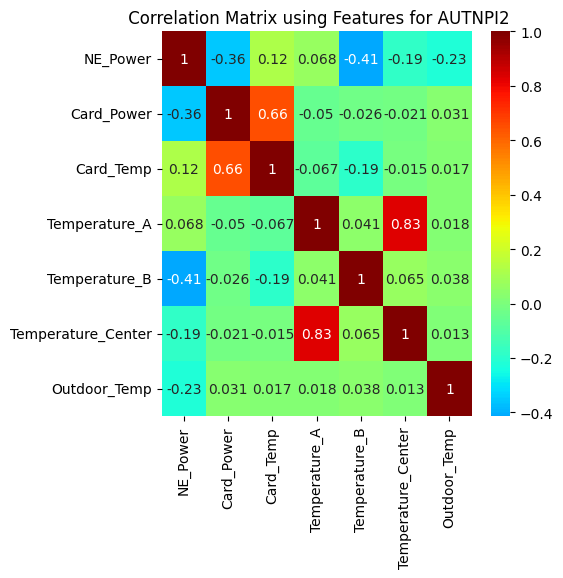

In [109]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI2.NE_Power,C_AUTNPI2.Card_Power,C_AUTNPI2.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' Correlation Matrix using Features for AUTNPI2')
plt.show()


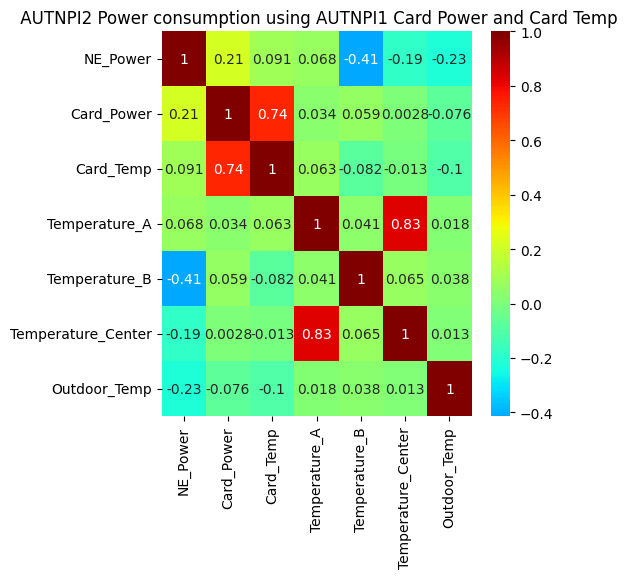

In [110]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI2.NE_Power,C_AUTNPI1.Card_Power,C_AUTNPI1.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI2 Power consumption using AUTNPI1 Card Power and Card Temp')
plt.show()


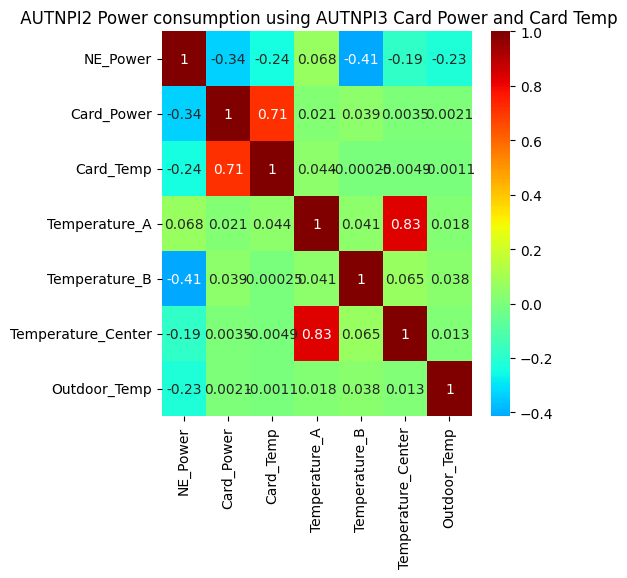

In [111]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI2.NE_Power,C_AUTNPI3.Card_Power,C_AUTNPI3.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI2 Power consumption using AUTNPI3 Card Power and Card Temp')
plt.show()

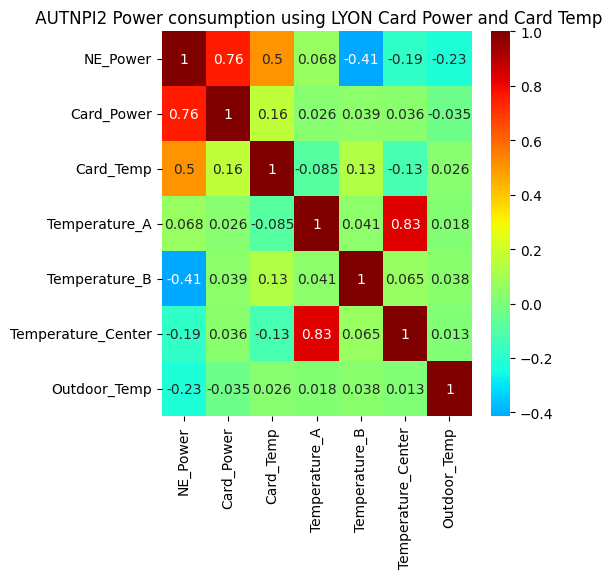

In [112]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI2.NE_Power,C_Lyon.Card_Power,C_Lyon.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI2 Power consumption using LYON Card Power and Card Temp')
plt.show()

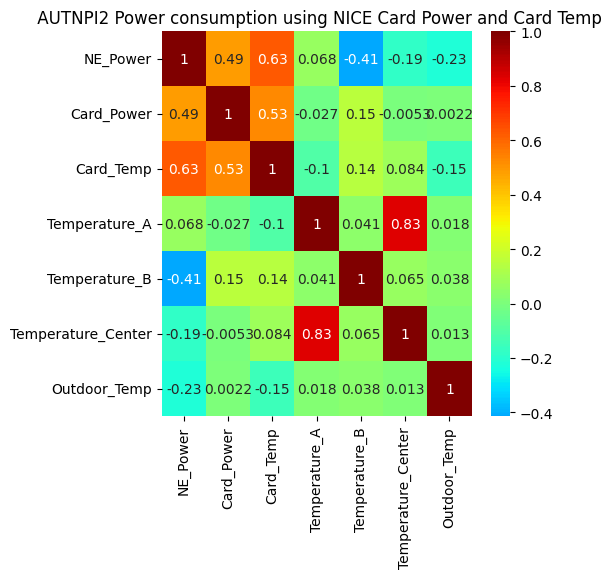

In [113]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI2.NE_Power,C_nice.Card_Power,C_nice.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI2 Power consumption using NICE Card Power and Card Temp')
plt.show()

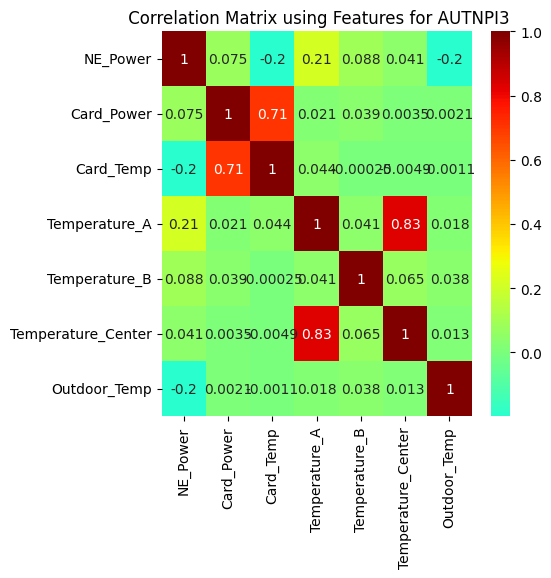

In [114]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI3.NE_Power,C_AUTNPI3.Card_Power,C_AUTNPI3.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' Correlation Matrix using Features for AUTNPI3')
plt.show()

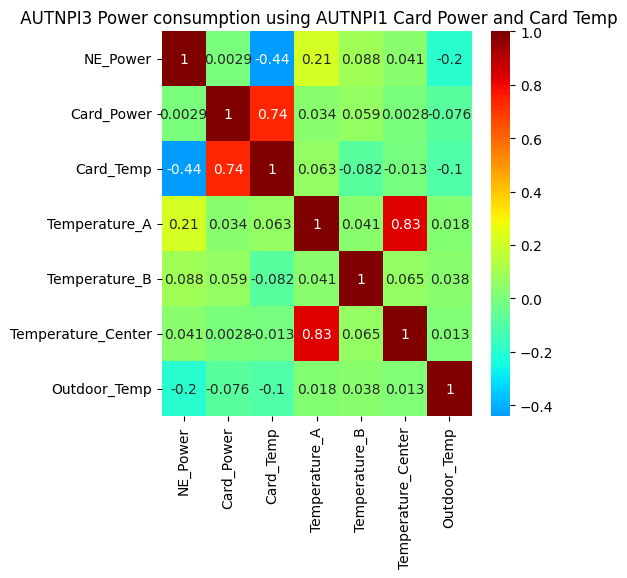

In [115]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI3.NE_Power,C_AUTNPI1.Card_Power,C_AUTNPI1.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI3 Power consumption using AUTNPI1 Card Power and Card Temp')
plt.show()

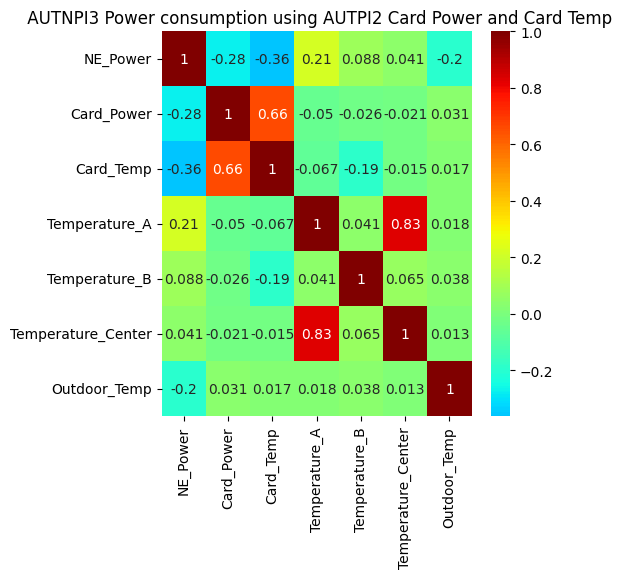

In [116]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI3.NE_Power,C_AUTNPI2.Card_Power,C_AUTNPI2.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI3 Power consumption using AUTPI2 Card Power and Card Temp')
plt.show()

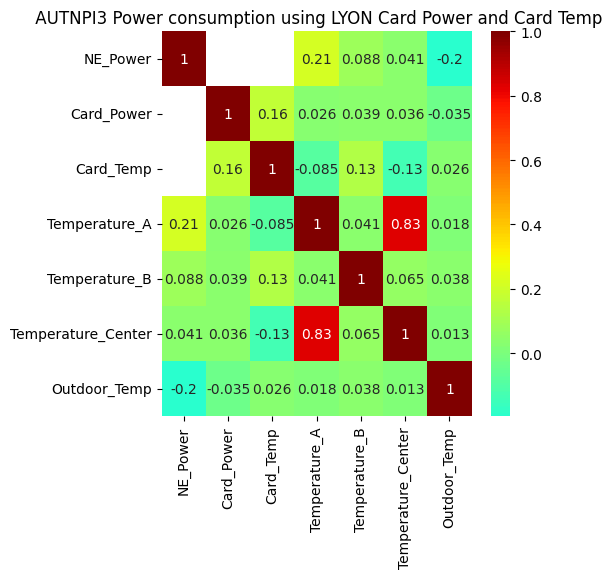

In [117]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI3.NE_Power,C_Lyon.Card_Power,C_Lyon.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI3 Power consumption using LYON Card Power and Card Temp')
plt.show()

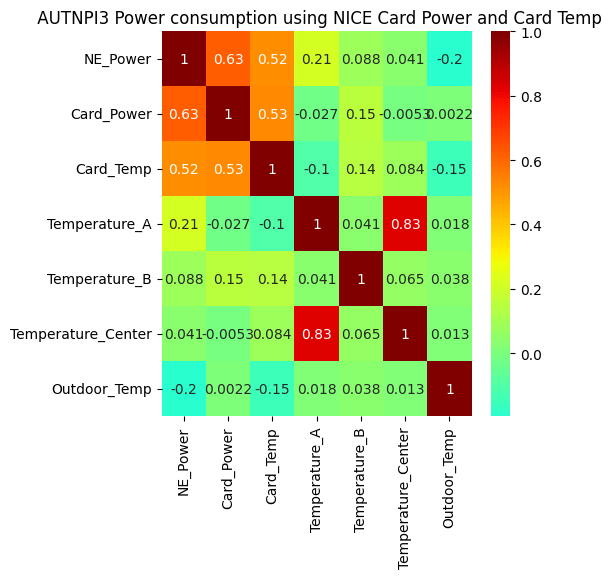

In [118]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([AUTNPI3.NE_Power,C_nice.Card_Power,C_nice.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' AUTNPI3 Power consumption using NICE Card Power and Card Temp')
plt.show()

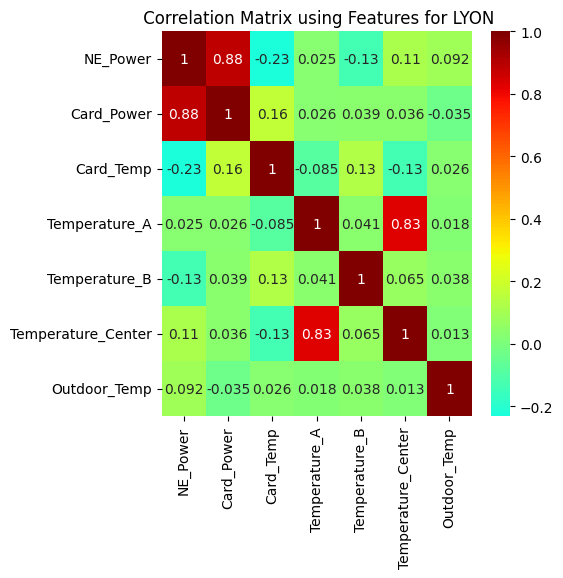

In [123]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([Lyon.NE_Power,C_Lyon.Card_Power,C_Lyon.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' Correlation Matrix using Features for LYON')
plt.show()

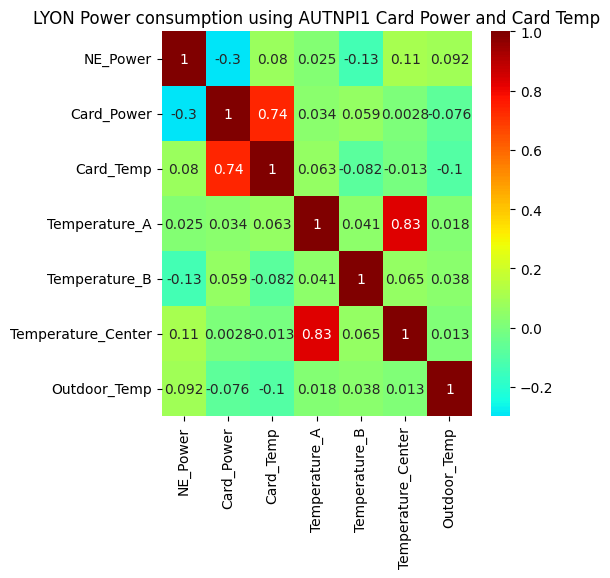

In [124]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([Lyon.NE_Power,C_AUTNPI1.Card_Power,C_AUTNPI1.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('LYON Power consumption using AUTNPI1 Card Power and Card Temp')
plt.show()

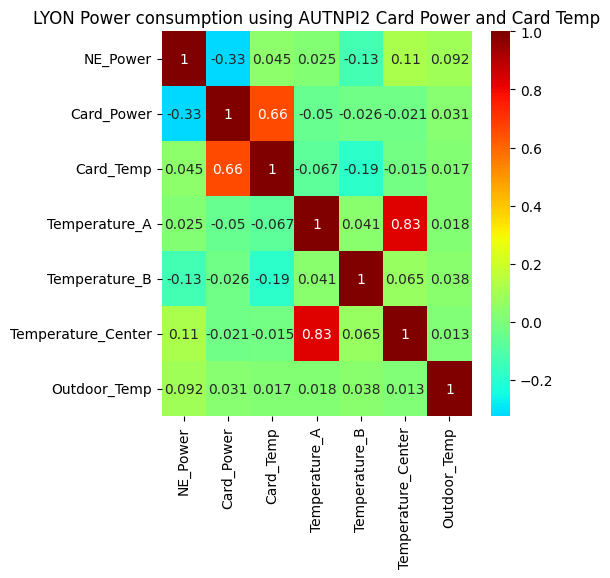

In [125]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([Lyon.NE_Power,C_AUTNPI2.Card_Power,C_AUTNPI2.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('LYON Power consumption using AUTNPI2 Card Power and Card Temp')
plt.show()

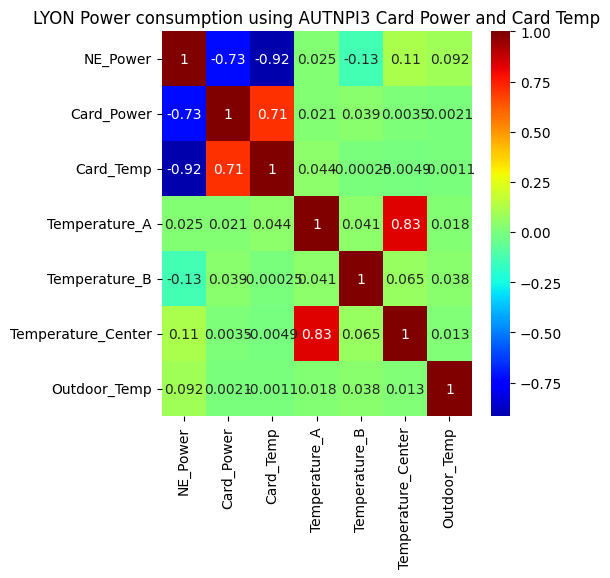

In [126]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([Lyon.NE_Power,C_AUTNPI3.Card_Power,C_AUTNPI3.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('LYON Power consumption using AUTNPI3 Card Power and Card Temp')
plt.show()

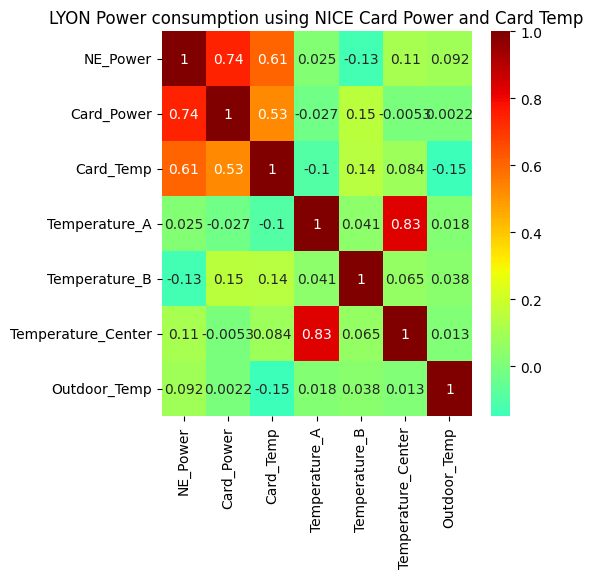

In [127]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([Lyon.NE_Power,C_nice.Card_Power,C_nice.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('LYON Power consumption using NICE Card Power and Card Temp')
plt.show()

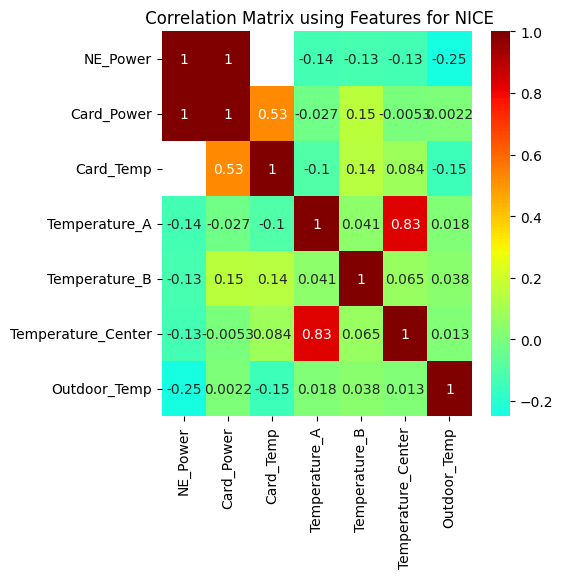

In [128]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([nice.NE_Power,C_nice.Card_Power,C_nice.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title(' Correlation Matrix using Features for NICE')
plt.show()

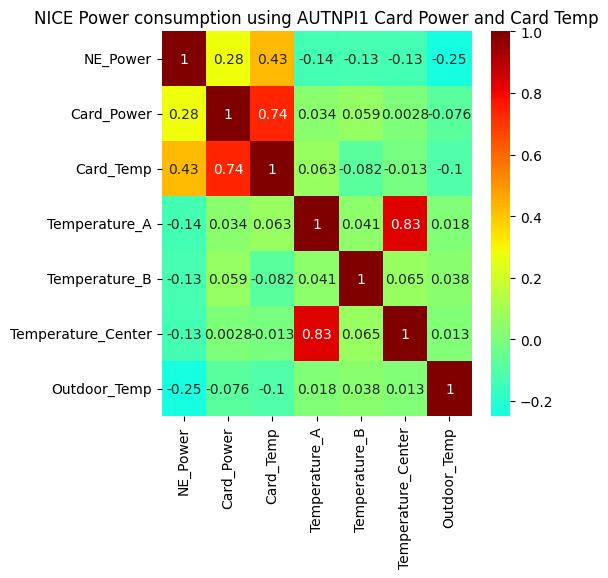

In [129]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([nice.NE_Power,C_AUTNPI1.Card_Power,C_AUTNPI1.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('NICE Power consumption using AUTNPI1 Card Power and Card Temp')
plt.show()

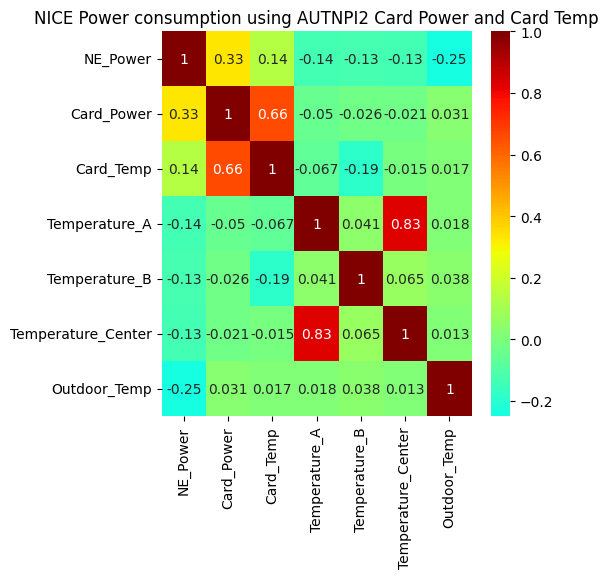

In [130]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([nice.NE_Power,C_AUTNPI2.Card_Power,C_AUTNPI2.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('NICE Power consumption using AUTNPI2 Card Power and Card Temp')
plt.show()

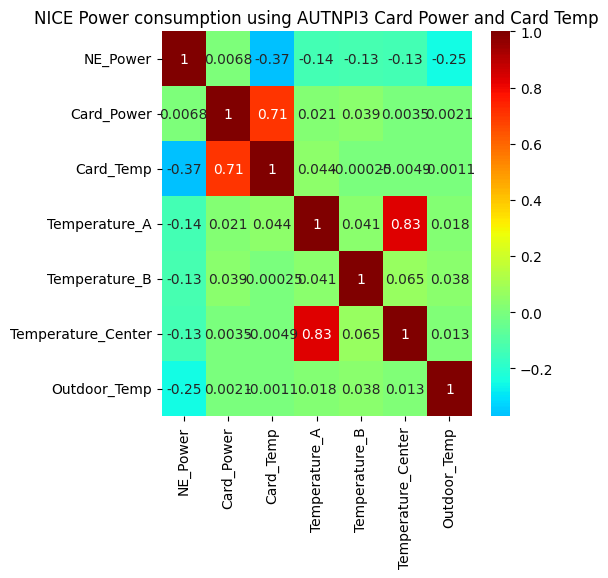

In [131]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([nice.NE_Power,C_AUTNPI3.Card_Power,C_AUTNPI3.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('NICE Power consumption using AUTNPI3 Card Power and Card Temp')
plt.show()

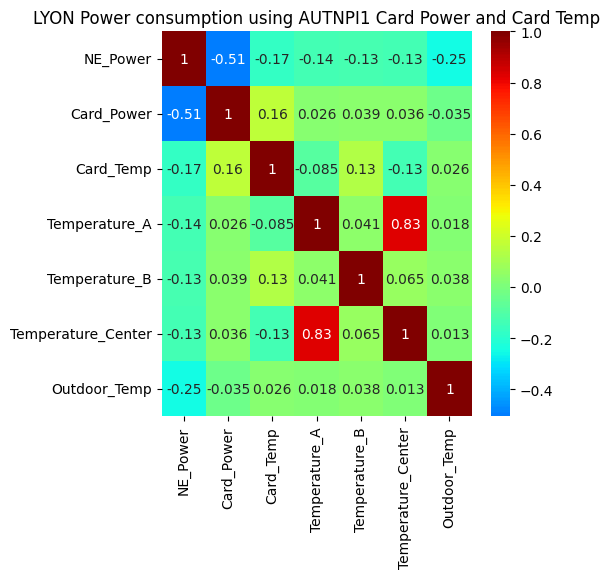

In [132]:
# Create a DataFrame by concatenating the series along columns
Total1 = pd.concat([nice.NE_Power,C_Lyon.Card_Power,C_Lyon.Card_Temp,Data_Temp],axis=1)
correlation_matrix = Total1.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', center=0)
plt.title('LYON Power consumption using AUTNPI1 Card Power and Card Temp')
plt.show()

Machine Learning Analysis using Time Series models